### Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

### Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [479]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge
%matplotlib inline

In [260]:
car_df = pd.read_csv('cars-dataset.csv')

In [261]:
car_df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [262]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [263]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [264]:
print("1. 'hp' column is not in the above list. It means there are some no numeric values in it")
print("2. It seems almost all columns are normally distributed.")
print("3. 'wt' column has very high standard deviation.")
print("4. There are high possibility of potential outliers.")

1. 'hp' column is not in the above list. It means there are some no numeric values in it
2. It seems almost all columns are normally distributed.
3. 'wt' column has very high standard deviation.
4. There are high possibility of potential outliers.


In [265]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [266]:
print("1. It seems that column 'hp' has some non-numeric values.")
print("2. It seems there are no missing values.")

1. It seems that column 'hp' has some non-numeric values.
2. It seems there are no missing values.


In [267]:
#checking all columns for missing values
car_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [268]:
print("There are no missing values in any column.")

There are no missing values in any column.


In [269]:
# Checking 'hp' column for Non-numeric values
bool_nonnumeric = ~car_df['hp'].str.isnumeric()
print("There are {} non-numeric values in 'hp' column.".format(len(car_df.loc[bool_nonnumeric, 'hp'])))

There are 6 non-numeric values in 'hp' column.


In [270]:
# Replacing non-numeric values with suitable numeric values, may be with median
car_df_hp_numeric = pd.to_numeric(car_df.loc[~bool_nonnumeric, 'hp'])
car_df.loc[bool_nonnumeric, 'hp'] = np.median(car_df_hp_numeric)

In [271]:
# Checking again if non-numeric values have been replaced
car_df['hp'] = pd.to_numeric(car_df['hp'])

In [272]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [273]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


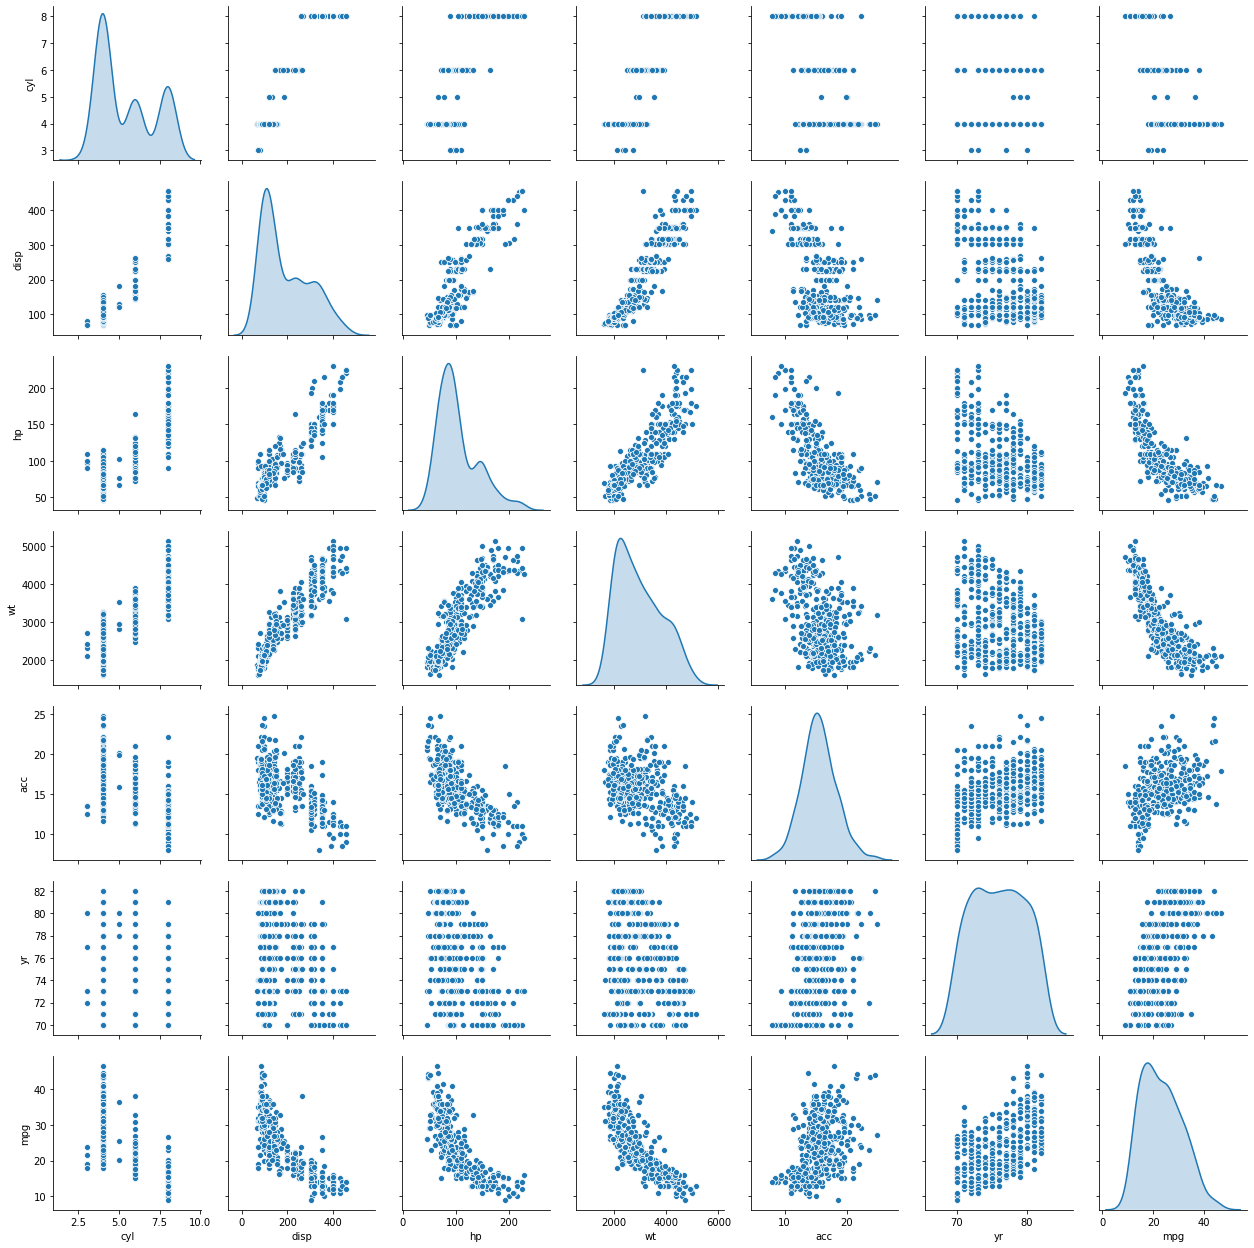

In [274]:
# Visualize different clustures present in the current dataset
sns.pairplot(car_df, diag_kind='kde')

In [275]:
print("1. column 'cyl', 'disp' and 'hp' seems to have 3 different data sets. Hence, there is possibility of 3 clustures.")
print()
print("2. No column seems to have good relationship with cylender.")
print()
print("3. Some of the columns such as 'wt' are linearly correlated with 'disp' and 'hp'")
print()
print("4. Almost all columns has non-colinear relationship with column 'mpg'. \
Here, we will drop this column as it's a target column  and we are working on unsuperwised learning.")

1. column 'cyl', 'disp' and 'hp' seems to have 3 different data sets. Hence, there is possibility of 3 clustures.

2. No column seems to have good relationship with cylender.

3. Some of the columns such as 'wt' are linearly correlated with 'disp' and 'hp'

4. Almost all columns has non-colinear relationship with column 'mpg'. Here, we will drop this column as it's a target column  and we are working on unsuperwised learning.


In [276]:
# Taking dataset without 'mpg' column to avoid it's impact on clustiring of the data.
y = car_df[['mpg']]
car_df.drop(['mpg'], axis=1, inplace=True)

In [277]:
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70
1,buick skylark 320,8,350.0,165.0,3693,11.5,70
2,plymouth satellite,8,318.0,150.0,3436,11.0,70
3,amc rebel sst,8,304.0,150.0,3433,12.0,70
4,ford torino,8,302.0,140.0,3449,10.5,70


In [278]:
# Standardize all the data before applying clusturing algorithms
# We will not use car name as well as it's not useful.
scaler = StandardScaler()

# Standardize All columns in dataset except target column 'mpg' and 'car name'
car_df_metric = scaler.fit_transform(car_df.drop(['car name'], axis=1))

# Standardize target column as well
y_std = scaler.fit_transform(y)

# Creating a dataframe for standardize data for better presentation
car_df_std = pd.DataFrame(car_df_metric, columns=car_df.columns[1:])
car_df_std.head(2)

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426


In [279]:
#Initialize a list distortion[] to track SSE for KMeans with different K
kmax = int(np.sqrt(car_df_std.shape[0]))
distortion = np.arange(1, kmax+1)
for i in range(1,kmax):
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    
    #Fit on the data
    km.fit(car_df_std)
    
    #Add cluster information for each record in dataframe
    km.predict(car_df_std)
    
    #Track SSE information in distortion
    distortion[i] = km.inertia_

[2388 1068  807  640  569  494  449  406  376  348  326  309  289  277
  265  251  242  230]


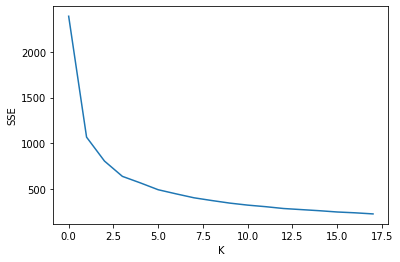

In [280]:
# Plotting Knee Plot to find Optimzed value of K
print(distortion[1:])
plt.plot(distortion[1:])
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [281]:
print("After K=3, we see that SSE is almost constant")
print("Lets take K = 3 and visualize the results")

After K=3, we see that SSE is almost constant
Lets take K = 3 and visualize the results


In [282]:
#Initialize KMeans
km = KMeans(n_clusters=3)
    
#Fit on the data
km.fit(car_df_std)
    
#Add cluster information for each record in dataframe
car_df_std['Clusture_3'] = km.predict(car_df_std)

In [283]:
# Finding different Clustures
clusture_df = pd.DataFrame(km.cluster_centers_, columns=car_df_std.columns[:6])
clusture_df.head()
#print(km.cluster_centers_.shape)

,cyl,disp,hp,wt,acc,yr
0,-0.861927,-0.808396,-0.660043,-0.774476,0.356511,0.284826
1,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556
2,0.415875,0.292454,-0.056271,0.318693,0.294241,0.043865


Distribution of all Clustures


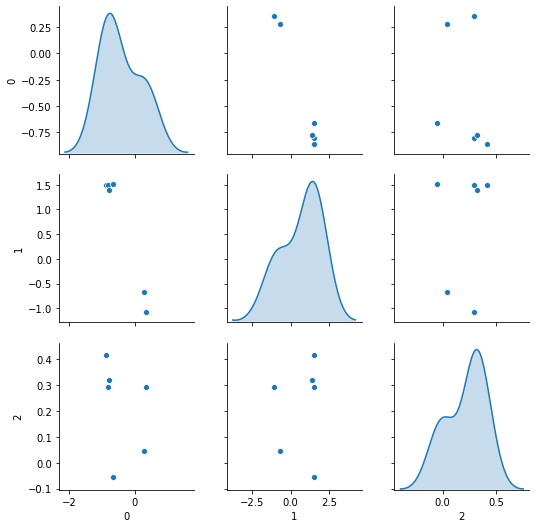

In [284]:
print("Distribution of all Clustures")
sns.pairplot(clusture_df.T, diag_kind='kde')

In [285]:
# Adding back 'mpg' column to the standardize dataset to be able to apply linear regression in future
car_df_std['mpg'] = y_std
car_df_std.head()

,cyl,disp,hp,wt,acc,yr,Clusture_3,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1,-0.834543


Distribution of Car dataset in the reference of new clustures



d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


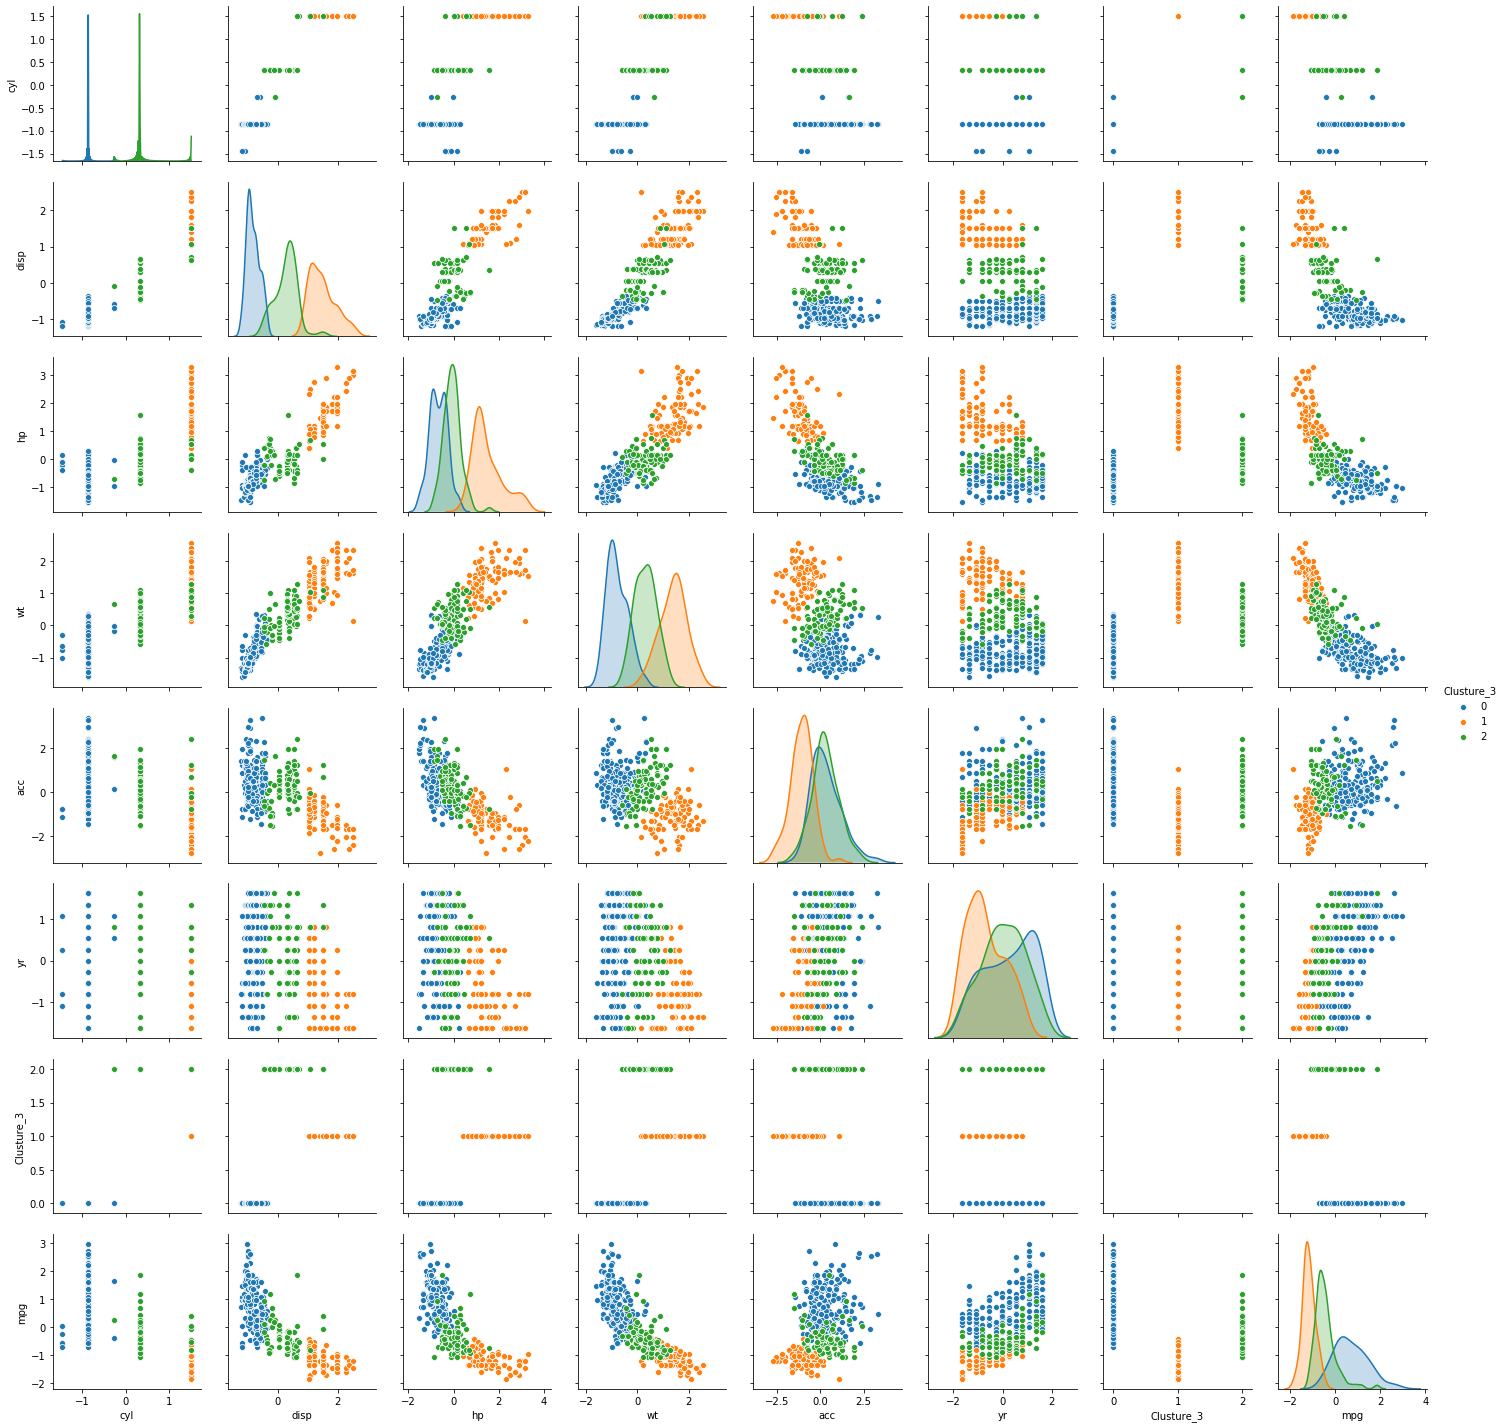

In [286]:
print("Distribution of Car dataset in the reference of new clustures")
print()
sns.pairplot(car_df_std, diag_kind='kde', hue='Clusture_3')

In [289]:
car_df_clusture1 = car_df_std.loc[car_df_std['Clusture_3']==0].drop('Clusture_3', axis=1)
car_df_clusture1.head()

,cyl,disp,hp,wt,acc,yr,mpg
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.190289
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.062185


In [290]:
car_df_clusture2 = car_df_std.loc[car_df_std['Clusture_3']==1].drop('Clusture_3', axis=1)
car_df_clusture2.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [291]:
car_df_clusture3 = car_df_std.loc[car_df_std['Clusture_3']==2].drop('Clusture_3', axis=1)
car_df_clusture3.head()

,cyl,disp,hp,wt,acc,yr,mpg
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,-0.194023
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,-0.706439
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-1.627426,-0.322127
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-1.627426,-0.322127
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.578335


In [434]:
#Applying Linear regression on all 3 Clustures seprately
def applyLinearModelAndPrintCoeff(model, car_clusture_df, test_size=0.3, random_state=7):
    # Seperating target column
    X = car_clusture_df.drop('mpg', axis=1)
    y = car_clusture_df[['mpg']]
    
    # Splitting test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Training Model
    model.fit(X_train, y_train)
    
    # Predicting
    y_pred = model.predict(X_test)
    
    # Model Score
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    
    # Printing Model Coefficient
    model_coeff.append(model.coef_)
    model_intercept.append(model.intercept_)

In [435]:
# Model Building
model = LinearRegression()
train_score = list()
test_score = list()
model_coeff = list()
model_intercept = list()
for data in (car_df_clusture1, car_df_clusture2, car_df_clusture3):
    applyLinearModelAndPrintCoeff(model, data, 0.3, 7)

In [436]:
result_df = pd.DataFrame(columns=['Clusture Model', 'Train Score', 'Test Score'])
result_df['Clusture Model'] = 'Clusture-1', 'Clusture-2', 'Clusture-3'
result_df['Train Score'] = train_score
result_df['Test Score'] = test_score
result_df.head()

,Clusture Model,Train Score,Test Score
0,Clusture-1,0.709129,0.680346
1,Clusture-2,0.540079,0.469861
2,Clusture-3,0.524247,-0.435945


In [443]:
coeff_df = pd.DataFrame(np.reshape(model_coeff, (3,6)), columns=car_df.columns[1:])
coeff_df['Intercept'] = model_intercept
coeff_df.head()

,cyl,disp,hp,wt,acc,yr,Intercept
0,1.025520,-0.517871,-0.308535,-0.724649,0.020473,0.432686,[0.31439540575517233]
1,0.310332,-0.153622,-0.140693,0.000457,-0.296339,0.193320,[-1.3745949609979404]
2,0.146077,0.109042,-0.432337,-0.461347,-0.135951,0.383590,[-0.32184977265432624]


In [371]:
print("1. Result is good for clusture-1 but still it is just 70% accurate which is not a good score.")
print()
print("2. Lets check with Lasso if we have some improvment")

1. Result is good for clusture-1 but still it is just 70% accurate which is not a good score.

2. Lets check with Lasso if we have some improvment


In [474]:
# Model Building with Ridge to check if we can achieve similar score but with less coefficient
model = Ridge(alpha=0.25, normalize=False)
train_score = list()
test_score = list()
model_coeff = list()
model_intercept = list()
for data in (car_df_clusture1, car_df_clusture2, car_df_clusture3):
    applyLinearModelAndPrintCoeff(model, data, 0.3, 7)

In [475]:
result_df = pd.DataFrame(columns=['Clusture Model', 'Train Score', 'Test Score'])
result_df['Clusture Model'] = 'Clusture-1', 'Clusture-2', 'Clusture-3'
result_df['Train Score'] = train_score
result_df['Test Score'] = test_score
result_df.head()

,Clusture Model,Train Score,Test Score
0,Clusture-1,0.708652,0.676372
1,Clusture-2,0.539509,0.504020
2,Clusture-3,0.524010,-0.397014


In [476]:
coeff_df = pd.DataFrame(np.reshape(model_coeff, (3,6)), columns=car_df.columns[1:])
coeff_df['Intercept'] = model_intercept
coeff_df.head()

,cyl,disp,hp,wt,acc,yr,Intercept
0,8.648945e-01,-0.450486,-0.324763,-0.730959,0.022212,0.430779,[0.21585399776107195]
1,9.585541e-30,-0.125144,-0.136942,-0.019939,-0.272650,0.188915,[-0.9053581074246075]
2,1.366686e-01,0.102000,-0.409347,-0.452750,-0.130405,0.379702,[-0.31896516786722984]
